In [88]:
#导入相关包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment',None) 
#不再弹出settingwithcopywarining警告
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [107]:
#导入数据
data = pd.read_excel('E://IT//毕设//result/data_twelve_first.xlsx')

In [108]:
data.columns

Index(['租金', '面积(平方米)', '服务费', 'A地铁线', 'B地铁线', 'C地铁线', '大区标签', '品牌标签',
       '租赁方式标签', '装修标签', '朝向标签', '电梯_标签', '车位_标签', '用水_标签', '用电_标签', '燃气_标签',
       '采暖_标签', 'A付款方式标签', 'B付款方式标签', 'C付款方式标签', '楼层标签', '卧室', '客厅', '卫生间',
       '房+卫+厅', '房/总', '卫/总', '厅/总', '卧室面积', '户型', '是否地铁', '小区_标签'],
      dtype='object')

In [109]:
df=pd.DataFrame(data)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import pandas as pd

In [111]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [112]:
#原始数据进行归一化处理（标准化ormin max）

In [113]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 假设 df 是你的数据 DataFrame

# 记录列名
columns = df.columns

# 使用 StandardScaler 进行标准化
scaler_standard = StandardScaler()
df_SS = scaler_standard.fit_transform(df)

# 将标准化后的数据转换为 DataFrame，并添加列名
df_SS = pd.DataFrame(df_SS, columns=columns)


In [114]:
# # 使用StandardScaler进行标准化
# scaler_standard = StandardScaler()
# df_SS = scaler_standard.fit_transform(df)

# # # 使用MinMaxScaler进行最小-最大缩放
# # scaler_minmax = MinMaxScaler()
# # X_minmax_scaled = scaler_minmax.fit_transform(X)

In [115]:
df_SS

,租金,面积(平方米),服务费,A地铁线,B地铁线,C地铁线,大区标签,品牌标签,租赁方式标签,装修标签,...,客厅,卫生间,房+卫+厅,房/总,卫/总,厅/总,卧室面积,户型,是否地铁,小区_标签
0,0.987885,-0.301396,0.164639,0.955208,0.882964,0.332361,-0.948950,-1.605027,-0.349114,-2.257468,...,-0.656831,-0.559330,-0.690508,0.029353,-0.025463,-0.016422,-0.093954,-0.563027,0.539593,-1.279817
1,0.857022,0.037665,0.147440,1.362536,-0.343090,-0.479782,-1.735782,-1.605027,-0.349114,0.442974,...,0.844281,-0.559330,-0.230014,-0.049858,-0.081766,0.152819,0.360602,-0.484798,0.539593,-1.278436
2,-0.809295,-0.698732,-0.071560,2.380858,-0.751774,-0.479782,-0.162117,-1.605027,-0.349114,0.442974,...,-2.157944,-0.559330,-1.611495,0.028366,0.255212,-0.298116,0.164476,-1.423541,0.539593,-1.277055
3,0.246330,0.658834,-0.219472,0.344215,-0.751774,-0.479782,-0.555534,-0.561366,-0.349114,0.442974,...,0.844281,0.867999,1.151467,0.029849,-0.025111,-0.016070,-0.112883,1.087597,0.539593,-1.275674
4,-0.931433,-0.731844,-0.219472,3.195516,3.539414,-0.479782,-1.735782,-0.561366,-0.349114,0.442974,...,-2.157944,-0.559330,-1.611495,0.028366,0.255212,-0.298116,0.076135,-1.423541,0.539593,-1.274293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12864,-1.005589,-1.177192,-0.097359,-0.674107,-0.751774,-0.479782,1.018132,0.482295,2.777365,0.442974,...,-0.656831,-0.559330,-0.230014,0.108960,-0.081766,-0.072649,-1.320429,0.219260,0.539593,1.426938
12865,-1.153900,-1.130836,-0.116851,1.362536,-0.343090,-0.479782,-1.735782,0.482295,2.777365,0.442974,...,-0.656831,0.867999,1.151467,0.129185,-0.025111,-0.157093,-1.337504,1.791654,0.539593,-1.278436
12866,-1.005589,-1.087791,-0.097359,-1.081436,-0.751774,-0.479782,1.018132,0.482295,2.777365,0.442974,...,-0.656831,-0.559330,-0.230014,0.108960,-0.081766,-0.072649,-1.240393,0.219260,-1.853248,0.161944
12867,-0.307655,-1.033157,-0.005631,-0.674107,-0.751774,-0.479782,1.018132,0.482295,2.777365,0.442974,...,-0.656831,-0.559330,0.690973,0.200037,-0.146181,-0.136976,-1.284967,1.783832,0.539593,0.261376


In [116]:
# 1. 数据准备
X = df_SS.drop(['租金'], axis=1)  # 获取除了第一列之外的所有列作为特征
y = df_SS['租金']  # 获取第一列数据作为目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# 查看 X 的列数
num_columns1 = X.shape[1]
num_columns2 = y.shape[0]
print("X 中的列数为:", num_columns1)
print("X 中的列数为:", num_columns2)

X 中的列数为: 31
X 中的列数为: 12869


In [118]:
#基线

In [119]:
xgb_reg=XGBRegressor(max_depth=5,n_estimators=500,n_jobs=-1)
xgb_reg.fit(X_train,y_train)
y_pred=xgb_reg.predict(X_test)

sub=pd.DataFrame({
    'id':y_test,
    'price':y_pred
})
sub.to_csv('E:\\IT\\毕设\\result\\特征工程\\baseline1.csv',index=False)

In [120]:
#特征工程

In [121]:
#baseline XGB

In [122]:
#以默认参数的XGB分数为准，低于此基准线2.554的模型一律不考虑。

'RoomDir'
0.6137775085907314 
         fe        im
7    租赁方式标签  0.216124
5      大区标签  0.077492
13    用电_标签  0.074029
0   面积(平方米)  0.069358
17  B付款方式标签  0.044892
25      卫/总  0.039819
2      A地铁线  0.035251
8      装修标签  0.032467
28       户型  0.032310
22      卫生间  0.029040
4      C地铁线  0.028587
12    用水_标签  0.027836
10    电梯_标签  0.027533
27     卧室面积  0.024178
23    房+卫+厅  0.024079
3      B地铁线  0.023422
30    小区_标签  0.020652
26      厅/总  0.019425
14    燃气_标签  0.017400
24      房/总  0.017053
20       卧室  0.016483
1       服务费  0.015940
21       客厅  0.015881
6      品牌标签  0.014921
9      朝向标签  0.014353
11    车位_标签  0.013423
19     楼层标签  0.013085
16  A付款方式标签  0.009790
18  C付款方式标签  0.003504
15    采暖_标签  0.001674
29     是否地铁  0.000000


<Figure size 640x480 with 0 Axes>

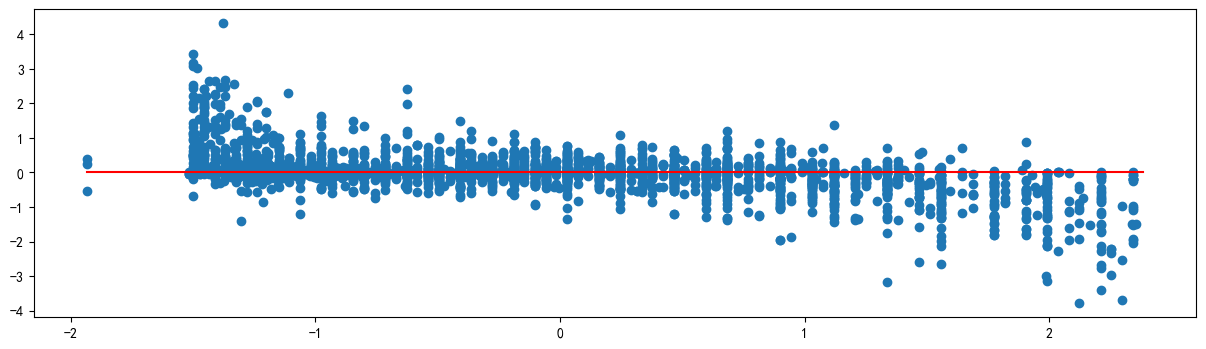

In [123]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def xgb_eval(train_df, val_df):
    train_df = train_df.copy()
    val_df = val_df.copy()

    try:
        from sklearn.preprocessing import LabelEncoder
        lb_encoder = LabelEncoder()
        lb_encoder.fit(train_df.loc[:, 'RoomDir'].append(val_df.loc[:, 'RoomDir']))
        train_df.loc[:, 'RoomDir'] = lb_encoder.transform(train_df.loc[:, 'RoomDir'])
        val_df.loc[:, 'RoomDir'] = lb_encoder.transform(val_df.loc[:, 'RoomDir'])
    except Exception as e:
        print(e)

    X_train = train_df.drop(['租金'], axis=1)
    Y_train = train_df.loc[:, '租金'].values
    X_val = val_df.drop(['租金'], axis=1)
    Y_val = val_df.loc[:, '租金'].values

    try:
        eval_df = val_df.copy().drop('Time', axis=1)
    except Exception as e:
        eval_df = val_df.copy()

    reg_model = xgb.XGBRegressor(max_depth=5, n_estimators=500, n_jobs=-1)
    reg_model.fit(X_train, Y_train)

    y_pred = reg_model.predict(X_val)
    print(np.sqrt(mean_squared_error(Y_val, y_pred)), end=' ')

    eval_df.loc[:, 'Y_pred'] = y_pred
    eval_df.loc[:, 'RE'] = eval_df.loc[:, 'Y_pred'] - eval_df.loc[:, '租金']

    print('')
    feature = X_train.columns
    fe_im = reg_model.feature_importances_
    print(pd.DataFrame({'fe': feature, 'im': fe_im}).sort_values(by='im', ascending=False))

    plt.clf()
    plt.figure(figsize=(15, 4))
    plt.plot([Y_train.min(), Y_train.max()], [0, 0], color='red')
    plt.scatter(x=eval_df.loc[:, '租金'], y=eval_df.loc[:, 'RE'])
    plt.show()

    return eval_df

# 分割数据集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 对训练集和测试集进行评估
train_eval_df = xgb_eval(train_df=pd.concat([X_train, y_train], axis=1), val_df=pd.concat([X_test, y_test], axis=1))

# train_eval_df 包含了模型在测试集上的预测结果和误差，可以进行进一步的分析和评估。


'RoomDir'
0.8333605467010219 
         fe        im
0   面积(平方米)  0.739668
5      大区标签  0.067071
2      A地铁线  0.049175
30    小区_标签  0.031241
13    用电_标签  0.029844
27     卧室面积  0.027940
4      C地铁线  0.021728
10    电梯_标签  0.013540
1       服务费  0.011405
14    燃气_标签  0.008108
22      卫生间  0.000255
3      B地铁线  0.000025
20       卧室  0.000000
29     是否地铁  0.000000
28       户型  0.000000
26      厅/总  0.000000
25      卫/总  0.000000
24      房/总  0.000000
23    房+卫+厅  0.000000
21       客厅  0.000000
17  B付款方式标签  0.000000
19     楼层标签  0.000000
18  C付款方式标签  0.000000
16  A付款方式标签  0.000000
12    用水_标签  0.000000
11    车位_标签  0.000000
9      朝向标签  0.000000
8      装修标签  0.000000
7    租赁方式标签  0.000000
6      品牌标签  0.000000
15    采暖_标签  0.000000


<Figure size 640x480 with 0 Axes>

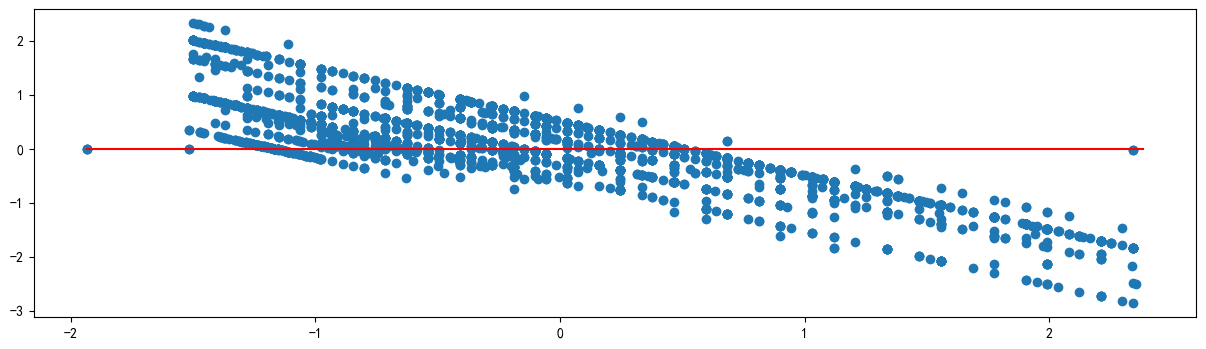

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def dt_eval(train_df, val_df):
    train_df = train_df.copy()
    val_df = val_df.copy()

    try:
        from sklearn.preprocessing import LabelEncoder
        lb_encoder = LabelEncoder()
        lb_encoder.fit(train_df.loc[:, 'RoomDir'].append(val_df.loc[:, 'RoomDir']))
        train_df.loc[:, 'RoomDir'] = lb_encoder.transform(train_df.loc[:, 'RoomDir'])
        val_df.loc[:, 'RoomDir'] = lb_encoder.transform(val_df.loc[:, 'RoomDir'])
    except Exception as e:
        print(e)

    X_train = train_df.drop(['租金'], axis=1)
    Y_train = train_df.loc[:, '租金'].values
    X_val = val_df.drop(['租金'], axis=1)
    Y_val = val_df.loc[:, '租金'].values

    try:
        eval_df = val_df.copy().drop('Time', axis=1)
    except Exception as e:
        eval_df = val_df.copy()

    dt_model = DecisionTreeRegressor(max_depth=5)
    dt_model.fit(X_train, Y_train)

    y_pred = dt_model.predict(X_val)
    print(np.sqrt(mean_squared_error(Y_val, y_pred)), end=' ')

    eval_df.loc[:, 'Y_pred'] = y_pred
    eval_df.loc[:, 'RE'] = eval_df.loc[:, 'Y_pred'] - eval_df.loc[:, '租金']

    print('')
    feature = X_train.columns
    fe_im = dt_model.feature_importances_
    print(pd.DataFrame({'fe': feature, 'im': fe_im}).sort_values(by='im', ascending=False))

    plt.clf()
    plt.figure(figsize=(15, 4))
    plt.plot([Y_train.min(), Y_train.max()], [0, 0], color='red')
    plt.scatter(x=eval_df.loc[:, '租金'], y=eval_df.loc[:, 'RE'])
    plt.show()

    return eval_df

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 对训练集和测试集进行评估
train_eval_df = dt_eval(train_df=pd.concat([X_train, y_train], axis=1), val_df=pd.concat([X_test, y_test], axis=1))

# train_eval_df 包含了模型在测试集上的预测结果和误差，可以进行进一步的分析和评估。


In [125]:
X_train

,面积(平方米),服务费,A地铁线,B地铁线,C地铁线,大区标签,品牌标签,租赁方式标签,装修标签,朝向标签,...,客厅,卫生间,房+卫+厅,房/总,卫/总,厅/总,卧室面积,户型,是否地铁,小区_标签
10810,0.046274,-0.219472,2.380858,2.722044,-0.479782,1.411548,-0.561366,-0.349114,0.442974,2.309822,...,0.844281,-0.559330,0.230479,0.029684,-0.119332,0.077788,-0.225134,0.297488,0.539593,-1.105812
5407,0.526389,-0.219472,-1.081436,-0.751774,-0.479782,-0.948950,1.525956,-0.349114,0.442974,-1.333917,...,-2.157944,-1.986660,-2.071989,0.420307,-0.307541,-0.298116,3.433089,-1.431364,-1.853248,0.559672
188,-0.135839,3.099933,-0.266778,-0.751774,-0.479782,0.624715,-0.561366,-0.349114,0.442974,-0.813383,...,0.844281,-0.559330,0.230479,0.029684,-0.119332,0.077788,-0.388168,0.297488,0.539593,-1.067144
1123,-0.003393,0.674876,-0.266778,0.065595,2.362720,-0.948950,-0.561366,-0.349114,-2.257468,-0.813383,...,0.844281,-0.559330,0.230479,0.029684,-0.119332,0.077788,-0.269597,0.297488,0.539593,-0.398741
7021,0.076074,-0.219472,-0.674107,0.065595,-0.479782,-0.948950,-0.561366,-0.349114,0.442974,0.748220,...,0.844281,-0.559330,-0.230014,-0.049858,-0.081766,0.152819,0.412094,-0.484798,0.539593,0.458859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-1.192092,-0.114558,-0.470443,-0.138748,-0.479782,-0.948950,0.482295,2.777365,0.442974,-1.333917,...,-0.656831,-0.559330,0.230479,0.162076,-0.119332,-0.110164,-1.356683,1.001546,0.539593,0.670152
5191,-0.069616,-0.219472,-1.081436,-0.751774,-0.479782,-0.162117,-0.561366,-0.349114,0.442974,1.789288,...,0.844281,-0.559330,-0.230014,-0.049858,-0.081766,0.152819,0.216778,-0.484798,-1.853248,-0.897281
5390,-0.433841,-0.219472,-0.674107,-0.751774,-0.479782,0.624715,-0.561366,-0.349114,0.442974,-0.813383,...,-0.656831,-0.559330,-1.151002,-0.103149,0.068251,0.077164,0.871203,-1.345313,0.539593,1.484940
860,0.691946,4.934492,-0.674107,-0.751774,-0.479782,0.624715,-0.561366,-0.349114,0.442974,0.748220,...,0.844281,0.867999,1.151467,0.029849,-0.025111,-0.016070,-0.090633,1.087597,0.539593,-1.173481


In [14]:
# 模型训练与评估

Best features: ['租赁方式标签', '平均值特征1', '大区+街道平均值特征', '平均值特征2', '平均值特征4']


[['Linear Regression', 1719332.5605189598, 1311.2332212535493, 0.671023008106949, 25.84494859199731], ['Random Forest', 3913.667931973581, 62.559315309341265, 0.999251159006062, 1.233069954233436]]
